## California Housing Prices

### 1. 패키지 설치 및 데이터 로드, 확인

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [12]:
df = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\0.preprocessing\datasets\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> 1. target : median_house_value  <br>
> 2. metric : 보통 회귀는 MAE, MSE, RMSE 사용. <br>
> 3. total_bedrooms 는 결측치가 있는 것으로 확인 <br>
> 4. ocean_proximity는 object 형 <br>


In [14]:
# object형을 어떻게 해야할지 ? 우선, 카테고리별 value_counts()확인
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
# 기초통계량 확인
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


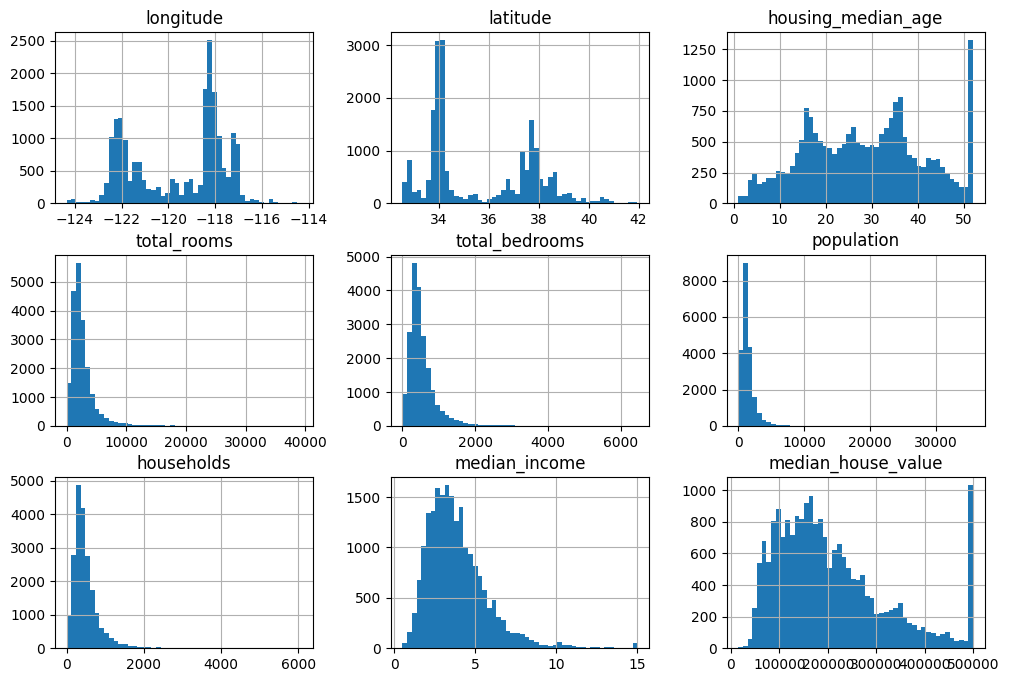

In [16]:
# 숫자형 데이터 특성을 파악하기 위해 히스토그램 시각화
df.hist(bins=50, figsize=(12,8))
plt.show()

> median_income의 경우 US달러로 표현되어 있지 않은 것 같다. min = 0.499900	, max = 15.000100. 따라서 median_income은 대략 수만 달러를 나타낸다. (ex. 3은 실제로 30,000달러를 의미)

> housing_median_age, median_house_value 역시 최댓값과 최솟값을 한정. median_house_value의 경우, 종속변수(target)으로서 심각한 문제가 될 수 있다. 가격이 한곗값을 넘어가지 않도록 머신러닝 알고리즘이 학습될지도 모른다. <br>
- 방법1. 한곗값 밖의 구역에 대한 정확한 레이블을 구한다. <br>
 - 방법2. 훈련세트에서 이런 구역을 제거한다.($500,000가 넘는 값에 대한 예측은 평가결과가 매우 나쁠 것이므로 테스트 세트에서도 제거.) <br>

 > 특성들의 스케일이 서로 많이 다르다. 

 > 많은 히스토그램에서 오른쪽 꼬리가 더 길다. 

### 2. 테스트 데이터 만들기

In [17]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = shuffle_and_split_data(df, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [21]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio*2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [22]:
df_with_id = df.reset_index()
train_set, test_set = split_data_with_id_hash(df_with_id, 0.2, 'index')

In [23]:
df_with_id['id'] = df['longitude'] * 1000 + df['latitude']
train_set, test_set = split_data_with_id_hash(df_with_id, 0.2, 'id')

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### 계층적 샘플링

In [25]:
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0. , 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1,2,3,4,5])

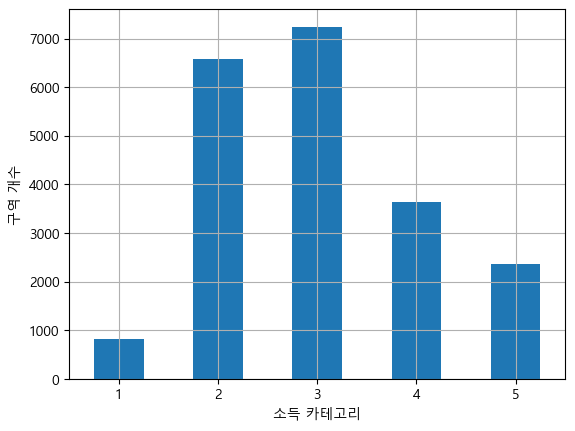

In [27]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

df['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('소득 카테고리')
plt.ylabel('구역 개수')
plt.show()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(df, df['income_cat']):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [29]:
strat_train_set, strat_test_set = strat_splits[0]

In [30]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df['income_cat'], random_state=42)

strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### 3. 데이터 이해를 위한 탐색과 시각화

In [32]:
housing = strat_train_set.copy()

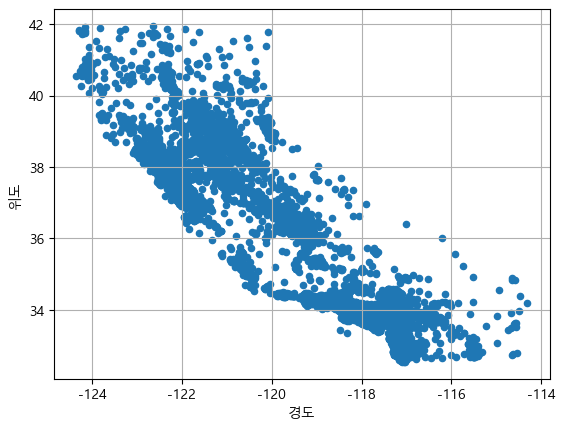

In [33]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True)
plt.xlabel('경도')
plt.ylabel('위도')
plt.show()

> 특별한 패턴을 찾기 힘들다. alpha값 주기! <br>
> alpha값을 주면 데이터 포인트가 밀집된 영역을 잘 보여준다.

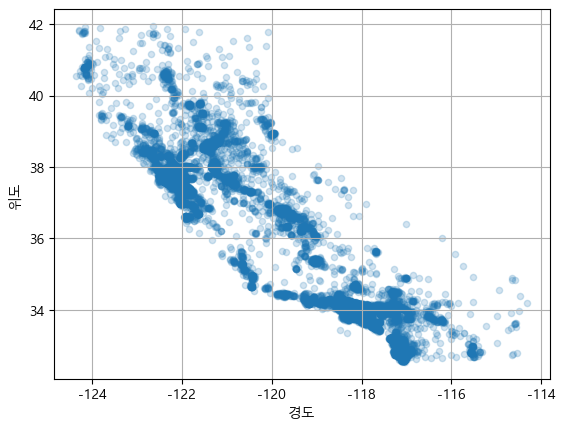

In [34]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.xlabel('경도')
plt.ylabel('위도')
plt.show()

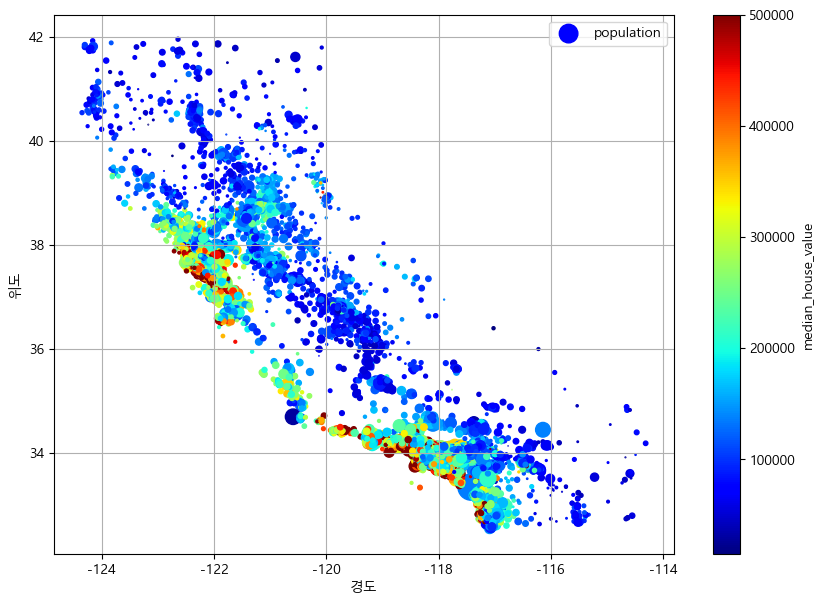

In [41]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True,
             s=housing['population']/100, label='population',
             c='median_house_value', cmap='jet', colorbar=True,
             figsize=(10,7))
plt.gcf().set_label('중간 주택 가격')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend()

plt.show()

핸즈온1_p98
